## 問題統整

1. SAR (Suspicious Activity Report) 的比例不均
    * 洗錢 (sar = 1) 有 234 筆資料
    * 正常 (sar = 0) 有 23672 筆資料

2. ccba 中為月資料，其他為日資料，如何轉換?

### Load Data & Explanation

In [7]:
import numpy as np
import pandas as pd

ccba_df = pd.read_csv("./public_train_x_ccba_full_hashed.csv")
cdtx_df = pd.read_csv("./public_train_x_cdtx0001_full_hashed.csv")
custinfo_df = pd.read_csv("./public_train_x_custinfo_full_hashed.csv")
dp_df = pd.read_csv("./public_train_x_dp_full_hashed.csv")
remit_df = pd.read_csv("./public_train_x_remit1_full_hashed.csv")
alert_time_0_364_df = pd.read_csv("./train_x_alert_date.csv")
alert_time_365_393_df = pd.read_csv("./public_x_alert_date.csv")
alert_time_df = pd.concat([alert_time_0_364_df, alert_time_365_393_df], axis=0)
alert_sar_df = pd.read_csv("./train_y_answer.csv")

### Load new data

In [8]:
import numpy as np
import pandas as pd

private_ccba_df = pd.read_csv("./private_x_ccba_full_hashed.csv")
private_cdtx_df = pd.read_csv("./private_x_cdtx0001_full_hashed.csv")
private_custinfo_df = pd.read_csv("./private_x_custinfo_full_hashed.csv")
private_dp_df = pd.read_csv("./private_x_dp_full_hashed.csv")
private_remit_df = pd.read_csv("./private_x_remit1_full_hashed.csv")
alert_time_0_364_df = pd.read_csv("./train_x_alert_date.csv")
private_alert_time_365_393_df = pd.read_csv("./private_x_alert_date.csv")
alert_time_df = pd.concat([alert_time_0_364_df, alert_time_365_393_df], axis=0)
alert_sar_df = pd.read_csv("./train_y_answer.csv")
private_y_answer = pd.read_csv("./24_ESun_public_y_answer.csv")

In [9]:
ccba_cust = set(ccba_df.cust_id.unique())
cdtx_cust = set(cdtx_df.cust_id.unique())
custinfo_cust = set(custinfo_df.cust_id.unique())
dp_cust = set(dp_df.cust_id.unique())
remit_cust = set(remit_df.cust_id.unique())
print (f"ccba: {len(ccba_cust)}")
print (f"cdtx: {len(cdtx_cust)}")
print (f"custinfo: {len(custinfo_cust)}")
print (f"dp: {len(dp_cust)}")
print (f"remit: {len(remit_cust)}")

ccba: 4745
cdtx: 3945
custinfo: 7708
dp: 6196
remit: 1144


In [10]:
# doc of set intersection: https://www.w3schools.com/python/ref_set_intersection.asp
print(f"intersection of custinfo & ccba: {len(custinfo_cust.intersection(ccba_cust))}")
print(f"intersection of custinfo & cdtx: {len(custinfo_cust.intersection(cdtx_cust))}")
print(f"intersection of custinfo & dp: {len(custinfo_cust.intersection(dp_cust))}")
print(f"intersection of custinfo & remit: {len(custinfo_cust.intersection(remit_cust))}")
print(f"intersection of custinfo & dp & cdtx: {len(custinfo_cust.intersection(cdtx_cust,dp_cust))}")
print(f"intersection of custinfo & dp & cdtx & remit: {len(custinfo_cust.intersection(cdtx_cust,dp_cust,remit_cust))}")

intersection of custinfo & ccba: 4745
intersection of custinfo & cdtx: 3945
intersection of custinfo & dp: 6196
intersection of custinfo & remit: 1144
intersection of custinfo & dp & cdtx: 3718
intersection of custinfo & dp & cdtx & remit: 734


In [11]:
y_cust = set(custinfo_df[custinfo_df.alert_key.isin(alert_sar_df.alert_key)].cust_id.unique())
print (f"y: {len(y_cust)}")

y: 7264


In [12]:
len(alert_sar_df.alert_key.unique())

23906

In [13]:
print(f"intersection of custinfo & y: {len(custinfo_cust.intersection(y_cust))}")
print(f"intersection of custinfo & y & dp: {len(custinfo_cust.intersection(y_cust,dp_cust))} *")
print(f"intersection of custinfo & y & dp & cdtx: {len(custinfo_cust.intersection(y_cust,dp_cust,cdtx_cust))}")
print(f"intersection of custinfo & y & dp & cdtx & ccba : {len(custinfo_cust.intersection(y_cust,dp_cust,cdtx_cust,cdtx_cust,ccba_cust))}")
print(f"intersection of custinfo & y & dp & cdtx & ccba & remit : {len(custinfo_cust.intersection(y_cust,dp_cust,cdtx_cust,ccba_cust,remit_cust))}")

intersection of custinfo & y: 7264
intersection of custinfo & y & dp: 5762 *
intersection of custinfo & y & dp & cdtx: 3466
intersection of custinfo & y & dp & cdtx & ccba : 3466
intersection of custinfo & y & dp & cdtx & ccba & remit : 687


In [14]:
public = pd.read_csv('./public_alert.csv')
custinfo_df = pd.read_csv("./public_train_x_custinfo_full_hashed.csv")
public_key = list(public.alert_key)
public_cust = set(custinfo_df[custinfo_df.alert_key.isin(public_key)].cust_id.unique())
print (f"y: {len(public_cust)}")

y: 735


In [15]:
print(f"intersection of custinfo & y: {len(custinfo_cust.intersection(public_cust))}")
print(f"intersection of custinfo & y & dp: {len(custinfo_cust.intersection(public_cust,dp_cust))} *")
print(f"intersection of custinfo & y & dp & cdtx: {len(custinfo_cust.intersection(public_cust,dp_cust,cdtx_cust))}")
print(f"intersection of custinfo & y & dp & cdtx & ccba : {len(custinfo_cust.intersection(public_cust,dp_cust,cdtx_cust,cdtx_cust,ccba_cust))}")
print(f"intersection of custinfo & y & dp & cdtx & ccba & remit : {len(custinfo_cust.intersection(public_cust,dp_cust,cdtx_cust,ccba_cust,remit_cust))}")

intersection of custinfo & y: 735
intersection of custinfo & y & dp: 706 *
intersection of custinfo & y & dp & cdtx: 409
intersection of custinfo & y & dp & cdtx & ccba : 409
intersection of custinfo & y & dp & cdtx & ccba & remit : 104


In [16]:
dt_df_public = custinfo_df.set_index('cust_id')
X_public = dt_df_public[dt_df_public.alert_key.isin(public_key)]
X_public.shape

(1845, 5)

### Team 11 Progress

#### Dataset Preprocessing
Merge custinfo,
ccba_cusm,
cdtx_amt,
dp_tx_amt,
remit_trade_amount_usd.

In [17]:
### 待續
custinfo_df_ver2 = custinfo_df.copy()
private_custinfo_df_ver2 = private_custinfo_df.copy()

#### Data Clean

In [18]:
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

def categorical_fillna(df):
    mode = statistics.mode(df)
    df = df.fillna(mode)
    return df

def numerical_fillna(df):
    median = statistics.median(df)
    df = df.fillna(median)
    return df

def numerical_normalize(df):
    x = df.values 
    x = x.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalized_df = pd.DataFrame(x_scaled)
    return normalized_df

def numerical_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df >= Q1 - 1.5 * IQR) & (df <= Q3 + 1.5 *IQR)  
    wtoutlier_df = df.loc[filter]
    return wtoutlier_df


print(custinfo_df_ver2["occupation_code"].isnull().values.any())
custinfo_df_ver2["occupation_code"] = numerical_fillna(custinfo_df_ver2["occupation_code"])
custinfo_df_ver2["occupation_code"] = numerical_normalize(custinfo_df_ver2["occupation_code"])
print(custinfo_df_ver2["occupation_code"].isnull().values.any())
print(custinfo_df_ver2)

print(private_custinfo_df_ver2["occupation_code"].isnull().values.any())
private_custinfo_df_ver2["occupation_code"] = numerical_fillna(private_custinfo_df_ver2["occupation_code"])
private_custinfo_df_ver2["occupation_code"] = numerical_normalize(private_custinfo_df_ver2["occupation_code"])
print(private_custinfo_df_ver2["occupation_code"].isnull().values.any())
print(private_custinfo_df_ver2)

# custinfo_df_ver2["occupation_code"] = categorical_fillna(custinfo_df_ver2["occupation_code"])
# onehotencoder = OneHotEncoder()
# data_str_ohe=onehotencoder.fit_transform(np.array(custinfo_df_ver2["occupation_code"]).reshape(-1,1)).toarray()
# custinfo_df_ver2["occupation_code"] = data_str_ohe

True
False
       alert_key                                            cust_id  \
0         352249  82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...   
1         352253  b212d14cb35676926682b2cf849e295d948888f556c07e...   
2         352254  e5b0002791c7852644a2730abeaa893cdf14a072ef7812...   
3         352280  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   
4         352282  0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...   
...          ...                                                ...   
25746     352123  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   
25747     352124  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   
25748     352125  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...   
25749     352128  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...   
25750     352132  c49b33d1fde790ec03584672903f296e486615adfdc989...   

       risk_rank  occupation_code  total_asset  AGE  
0              1             0.95    1465816.0    7  
1              1            

In [19]:
## public y and private y concat
#
alert_sar_df = pd.concat([alert_sar_df, private_y_answer], ignore_index=True, sort=False)
custinfo_df_ver2 = pd.concat([custinfo_df_ver2, private_custinfo_df_ver2], ignore_index=True, sort=False)

In [20]:
customer_df = custinfo_df_ver2.merge(alert_sar_df, how='inner',on='alert_key')
customer_df = customer_df[["cust_id", "risk_rank", "occupation_code", "total_asset", "AGE", "alert_key", "sar_flag"]]
#drop outlier
customer_df["occupation_code"] = numerical_outlier(customer_df["occupation_code"])

customer_df = customer_df.dropna()
customer_df

,cust_id,risk_rank,occupation_code,total_asset,AGE,alert_key,sar_flag
0,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,0.95,1465816.0,7,352249,0
1,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,0.10,98177.0,2,352253,0
2,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,0.95,2052922.0,7,352254,0
3,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,0.75,201906.0,5,352280,0
4,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,0.60,7450.0,5,352282,0
...,...,...,...,...,...,...,...
25746,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,0.85,12207.0,2,352123,0
25747,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,0.85,259985.0,4,352124,0
25748,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,0.95,928963.0,3,352125,0
25749,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,0.95,21647.0,4,352128,0


In [21]:
# customer_df = custinfo_df_ver2.merge(alert_sar_df, how='inner',on='alert_key')
# customer_df = customer_df[["cust_id", "risk_rank", "occupation_code", "total_asset", "AGE", "alert_key", "sar_flag"]]
# #drop outlier
# customer_df["occupation_code"] = numerical_outlier(customer_df["occupation_code"])

# customer_df = customer_df.dropna()
# customer_df

In [22]:
## address the imbalance problem
sar = customer_df[customer_df["sar_flag"]==1]
for i in range(100):
    customer_df = customer_df.append(sar)
customer_df

,cust_id,risk_rank,occupation_code,total_asset,AGE,alert_key,sar_flag
0,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,0.95,1465816.0,7,352249,0
1,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,0.10,98177.0,2,352253,0
2,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,0.95,2052922.0,7,352254,0
3,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,0.75,201906.0,5,352280,0
4,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,0.60,7450.0,5,352282,0
...,...,...,...,...,...,...,...
25016,9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...,1,0.65,310.0,3,346021,1
25162,a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...,2,0.55,258763.0,3,347051,1
25259,9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...,1,0.85,337845.0,5,347894,1
25364,2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...,1,0.95,2439013.0,2,348724,1


#### XGBoost

precision:  0.7638389031705227
recall:  0.9383157894736842
f1 score:  0.8421350968351441


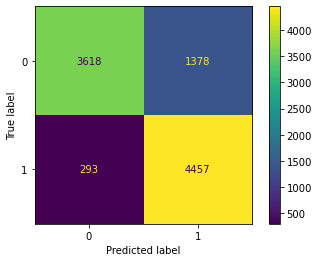

In [23]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

dt_df = customer_df.copy()
X = dt_df[["risk_rank", "occupation_code", "total_asset", "AGE"]]
y = dt_df["sar_flag"]
# y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Xgboost
xgb = XGBClassifier(n_estimators=500, learning_rate= 0.01,
                        objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)

xgb.fit(X_train, y_train)

y_predict = xgb.predict(X_test)

print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1 score: ", f1_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
precision:  0.800105392587388
recall:  0.9589473684210527
f1 score:  0.8723546873503782


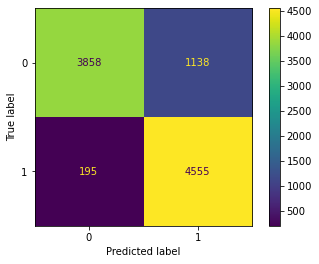

In [28]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

# def LGBM():
#     param_grid={
#     'num_leaves':[15, 20, 25, 30, 35, 40, 45],
#     'lambda_l1': [0.00001, 0.0001, 0.001, 0.1],
#     'lambda_l2': [0.00001, 0.0001, 0.001, 0.1],
#     }
#     gbm = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=30, n_estimators =50,
#                             learning_rate=0.01, max_depth= 5,
#                              bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9, n_jobs =1)
#     tscv = TimeSeriesSplit(n_splits= 5)    
#     gsearch  =GridSearchCV(estimator = gbm, param_grid= param_grid, cv=tscv,verbose=20)
#     return gsearch


gbm = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=30, n_estimators =50,
                                learning_rate=0.1, max_depth= 15, reg_alpha=0.001, reg_lambda=0.001,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, n_jobs =1)
gbm.fit(X_train, y_train)

y_predict = gbm.predict(X_test)

print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1 score: ", f1_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

precision:  0.7931702165111776
recall:  0.9486315789473684
f1 score:  0.8639631866551626


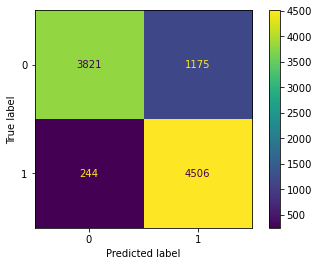

In [40]:
from sklearn.ensemble import RandomForestClassifier

rdm = RandomForestClassifier(max_depth=10, random_state=0)

rdm.fit(X_train, y_train)

y_predict = rdm.predict(X_test)

print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1 score: ", f1_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)




#### make public prediction in Team 11 Test

In [29]:
dt_df_public = custinfo_df.set_index('cust_id')
X_public = dt_df_public[dt_df_public.alert_key.isin(public_key)]
X_public.shape

(1845, 5)

In [30]:
public = pd.read_csv('./public_alert.csv')
custinfo_df_raw = pd.read_csv("./public_train_x_custinfo_full_hashed.csv")
public_key = list(public.alert_key)
cust_alert_dict = (custinfo_df_raw[['cust_id','alert_key']].set_index('alert_key')).to_dict()
public.head()

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526


In [31]:
print('X_shape:',X_public.shape)

X_shape: (1845, 5)


In [32]:
dt_df_public = custinfo_df_raw.set_index('cust_id')

alert_key_save = X_public.alert_key
X_public = X_public[X.columns]

In [33]:
X_public.head()

,risk_rank,occupation_code,total_asset,AGE
cust_id,,,,
82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1,1,19.0,1465816.0,7
b212d14cb35676926682b2cf849e295d948888f556c07e854c4cdad9f32f5084,1,2.0,98177.0,2
e5b0002791c7852644a2730abeaa893cdf14a072ef78120275815edbd596cec0,1,19.0,2052922.0,7
74214c478dc6519fbefe4bc31693865bdcd698ab974b6435bb8fa842a3ed4fd8,3,15.0,201906.0,5
0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b341860b7e09990369f6466,1,12.0,7450.0,5


In [34]:
## normalize predict code
X_public["occupation_code"] = numerical_normalize(X_public["occupation_code"]).values
X_public

,risk_rank,occupation_code,total_asset,AGE
cust_id,,,,
82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1,1,0.947368,1465816.0,7
b212d14cb35676926682b2cf849e295d948888f556c07e854c4cdad9f32f5084,1,0.052632,98177.0,2
e5b0002791c7852644a2730abeaa893cdf14a072ef78120275815edbd596cec0,1,0.947368,2052922.0,7
74214c478dc6519fbefe4bc31693865bdcd698ab974b6435bb8fa842a3ed4fd8,3,0.736842,201906.0,5
0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b341860b7e09990369f6466,1,0.578947,7450.0,5
...,...,...,...,...
18ee644a371548e9780d701aaa7e0c8c42a7794cdee755604435bb59b1d81304,1,0.842105,135072.0,3
7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e061e8f4bfe25fb35807d,3,0.578947,2285386.0,3
12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e9187a67cdcf485350f,3,0.947368,1230244.0,2


In [35]:
score_public = pd.DataFrame(xgb.predict_proba(X_public),columns=['nosar','sar'])
score_public['alert_key'] = alert_key_save.values
score_public = score_public.drop_duplicates()
score_public.sort_values('sar',ascending=False)

,nosar,sar,alert_key
327,0.097558,0.902442,354939
719,0.178632,0.821368,357304
91,0.178632,0.821368,353065
1833,0.181086,0.818914,364983
1457,0.182221,0.817779,362203
...,...,...,...
425,0.993923,0.006077,355555
31,0.993923,0.006077,352492
493,0.994865,0.005135,355900
550,0.994865,0.005135,356304


In [36]:
score_public.sort_values('sar',ascending=False).to_csv('./preiction_result.csv')

In [37]:
tmp = score_public.iloc[:,1:3]
tmp.loc[tmp.sar <= 0.5, 'sar'] = 0
tmp.loc[tmp.sar > 0.5, 'sar'] = 1
tmp

,sar,alert_key
0,0.0,352249
1,0.0,352253
2,0.0,352254
3,0.0,352280
4,1.0,352282
...,...,...
1840,1.0,365001
1841,0.0,365004
1842,0.0,365008
1843,0.0,365009


In [38]:
tmp2 = tmp.merge(private_y_answer, how='inner',on='alert_key')
tmp2

,sar,alert_key,sar_flag
0,0.0,352249,0
1,0.0,352253,0
2,0.0,352254,0
3,0.0,352280,0
4,1.0,352282,0
...,...,...,...
1840,1.0,365001,0
1841,0.0,365004,0
1842,0.0,365008,0
1843,0.0,365009,0


In [39]:
print("precision: ", precision_score(tmp2["sar"], tmp2["sar_flag"]))
print("recall: ", recall_score(tmp2["sar"], tmp2["sar_flag"]))
print("f1 score: ", f1_score(tmp2["sar"], tmp2["sar_flag"]))

precision:  0.9090909090909091
recall:  0.014534883720930232
f1 score:  0.028612303290414875


### Data Cleaning

In [86]:
def columns_with_null(df):
    cwn = []
    for column in df.columns:
        if df[column].isnull().values.any():
            cwn.append(column)
    return cwn

def rows_with_null(df):
    return df[df.isna().any(axis=1)]


### Null values

* dp_df
    1. tx_amt(交易金額) contains 22015 null values
    2. fiscTxId(交易代碼) contains 1043090 null values
    3. txbranch(分行代碼) contains 1003150 null values
    * Due to the large amount of null values, dropping them is not wise
* custinfo_df
    1. occupation contains 116 null values
    * Can directly drop na values

In [87]:
# Check null values in ccba_df
print(columns_with_null(ccba_df))

# Check null values in cdtx_df
print(columns_with_null(cdtx_df))

# Check null values in remit_df
print(columns_with_null(remit_df))

# Check null values in alert_time_0_364_df & alert_time_365_393_df
print(columns_with_null(alert_time_df))

# Check null values in alert_sar_df
print(columns_with_null(alert_sar_df))

[]
[]
[]
[]
[]


In [88]:
# Check null values in dp_df
print(columns_with_null(dp_df))
total = len(dp_df)
dp_w_null = rows_with_null(dp_df)
dp_wt_null = dp_df.dropna()
print(f"total: {total}")
print(f"rows containing nulls: {len(dp_w_null)}")
print(f"rows without nulls: {len(dp_wt_null)}")
print(f"is correct: {total == len(dp_w_null) + len(dp_wt_null)}")

['tx_amt', 'fiscTxId', 'txbranch']
total: 1969818
rows containing nulls: 1053245
rows without nulls: 916573
is correct: True


In [89]:
# Check null values in custinfo_df

print(columns_with_null(custinfo_df))
total = len(custinfo_df)
custinfo_w_null = rows_with_null(custinfo_df)
custinfo_wt_null = custinfo_df.dropna()
print(f"total: {total}")
print(f"rows containing nulls: {len(custinfo_w_null)}")
print(f"rows without nulls: {len(custinfo_wt_null)}")
print(f"is correct: {total == len(custinfo_w_null) + len(custinfo_wt_null)}")

['occupation_code']
total: 25751
rows containing nulls: 116
rows without nulls: 25635
is correct: True


### Duplicate Values
* cdtx_df contains 259965 duplicates
    * Reasonable, cust can do many transactions on the same day with the same country, cur_type and amt
* dp_df contains 89047 duplicates
    * What is fscTxId ?
* remit_df contains 990 duplicates
    * Reasonable, cust can do many transactions on the same day with the same trans_no, trade_amount_usd

In [90]:
# Check duplicated values in ccba_df
print(sum(ccba_df.duplicated()))
print(sum(custinfo_df.duplicated()))
print(sum(alert_time_df.duplicated()))
print(sum(alert_sar_df.duplicated()))

0
0
0
0


In [91]:
print(sum(cdtx_df.duplicated()))
cdtx_df.loc[cdtx_df.duplicated()]

259965


,cust_id,date,country,cur_type,amt
37,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,78,130,47,84.0
42,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,84,130,47,84.0
45,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,86,130,47,84.0
48,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,88,130,47,84.0
222,01c705b457297805c1c08137cb3adb164b8f393c265db2...,95,130,47,510.0
...,...,...,...,...,...
1042869,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,323,130,47,20878.0
1042940,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,382,130,47,522.0
1042943,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,385,130,47,522.0
1042957,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,387,130,47,1513.0


In [92]:
print(sum(dp_df.duplicated()))
dp_df.loc[dp_df.duplicated()]

89047


,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
51,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,218,16,2,51781.0,1.0,16,NaN,NaN,0,0
58,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,249,16,2,8935.0,1.0,16,NaN,NaN,0,0
294,01c705b457297805c1c08137cb3adb164b8f393c265db2...,CR,120,1,2,408.0,1.0,13,4.0,279.0,1,1
973,01c705b457297805c1c08137cb3adb164b8f393c265db2...,CR,133,6,2,1021.0,1.0,13,4.0,279.0,1,1
983,01c705b457297805c1c08137cb3adb164b8f393c265db2...,CR,123,16,2,2042.0,1.0,13,4.0,279.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1969786,fff94defcc33daab190e702926d583f6d805294354addb...,DB,62,17,2,1030.0,1.0,13,3.0,313.0,1,1
1969791,fff94defcc33daab190e702926d583f6d805294354addb...,DB,61,20,2,1030.0,1.0,13,3.0,313.0,1,1
1969799,fff94defcc33daab190e702926d583f6d805294354addb...,DB,73,19,2,1030.0,1.0,13,3.0,313.0,1,1
1969802,fff94defcc33daab190e702926d583f6d805294354addb...,DB,62,17,2,1030.0,1.0,13,3.0,313.0,1,1


In [93]:
print(sum(remit_df.duplicated()))
remit_df.loc[remit_df.duplicated()]

990


,cust_id,trans_date,trans_no,trade_amount_usd
299,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,22,0,50009.0
2464,7b11104618d8caa65909eaac749c1a42594f3c891fe062...,256,0,27173.0
3146,987fa9033f6d7d6750dac714e178516755e75bd87dceda...,362,0,30547.0
3636,b6f594909afde36b182e825a982b1c3095c2ea2e3d3c3f...,376,0,69014.0
4418,e2d9fc5c344f186a981b205df0279d934abbedf2e7387c...,69,4,7941.0
...,...,...,...,...
17065,fd510d1ced78b69593ba2f863419dacb5f81b49a45fa0c...,334,4,3629.0
17067,fd510d1ced78b69593ba2f863419dacb5f81b49a45fa0c...,334,4,4073.0
17070,fd510d1ced78b69593ba2f863419dacb5f81b49a45fa0c...,334,4,4073.0
17071,fd510d1ced78b69593ba2f863419dacb5f81b49a45fa0c...,334,4,3629.0


# Data Exploration
* Info of Data
    * risk_rank: Ordinal
    * occupation_code: Nominal
    * total_asset: Ratio
    * Age: Interval
* Insights

In [94]:
customer_df = custinfo_df.merge(alert_sar_df, how='inner',on='alert_key')
sar_df = customer_df.loc[customer_df.loc[:, "sar_flag"] == 1]
nsar_df = customer_df.loc[customer_df.loc[:, "sar_flag"] == 0]
customer_df = customer_df[["cust_id", "risk_rank", "occupation_code", "total_asset", "AGE", "alert_key", "sar_flag"]]
customer_df

,cust_id,risk_rank,occupation_code,total_asset,AGE,alert_key,sar_flag
0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,171142,0
1,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,171152,0
2,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,171177,0
3,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,171178,0
4,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,171180,0
...,...,...,...,...,...,...,...
23901,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,352123,0
23902,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,352124,0
23903,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,352125,0
23904,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,352128,0


In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series

def fill_missing_group(series, categories):
    dict_obj = series.to_dict()
    for c in categories:
        if c not in dict_obj:
            dict_obj[c] = 0
    return Series(dict_obj)

## Risk Rank

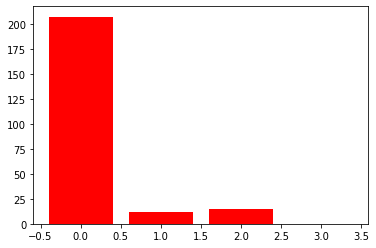

In [96]:
categories = customer_df.groupby("risk_rank").size().index
            
risk_rank_df = customer_df[["risk_rank", "sar_flag"]]

rrs_df = risk_rank_df.loc[risk_rank_df["sar_flag"] == 1]
rrs_series = fill_missing_group(rrs_df.groupby("risk_rank").size(), categories)

plt.bar(categories, rrs_series, color="red")
plt.show()

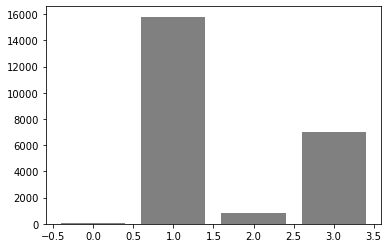

In [97]:
rrns_df = risk_rank_df.loc[risk_rank_df["sar_flag"] == 0]
rrns_series = fill_missing_group(rrns_df.groupby("risk_rank").size(), categories)

plt.bar(categories, rrns_series, color="gray")
plt.show()

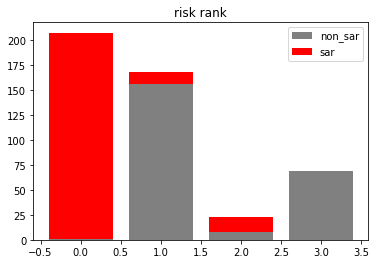

In [98]:
rrns_normalize_series = rrns_series * (len(rrs_df) / len(rrns_df))

plt.title("risk rank")
plt.bar(categories, rrns_normalize_series, color="gray", label="non_sar")
plt.bar(categories, rrs_series, bottom=rrns_normalize_series, color="red", label="sar")
plt.legend()
plt.show()

## Occupation Code

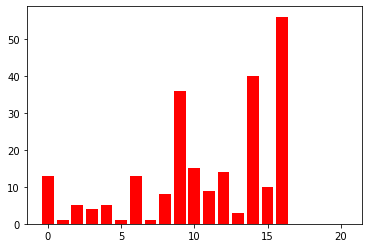

In [99]:
occupation_df = customer_df[["occupation_code", "sar_flag"]]
occ_categories = occupation_df.groupby("occupation_code").size().index

occs_df = occupation_df.loc[occupation_df.loc[:, "sar_flag"] == 1]
occs_series = fill_missing_group(occs_df.groupby("occupation_code").size(), occ_categories)

plt.bar(occ_categories, occs_series, color="red")
plt.show()

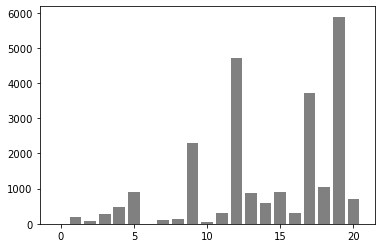

In [100]:
occns_df = occupation_df.loc[occupation_df.loc[:, "sar_flag"] == 0]
occns_series = fill_missing_group(occns_df.groupby("occupation_code").size(), occ_categories)

plt.bar(occ_categories, occns_series, color="grey")
plt.show()

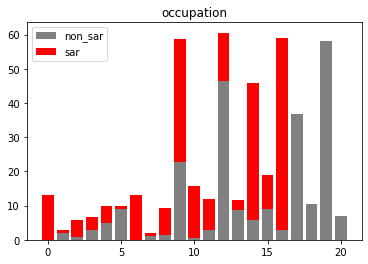

In [101]:
occns_normalize_series = occns_series * (len(occs_df) / len(occns_df))

plt.title("occupation")
plt.bar(occ_categories, occns_normalize_series, color="gray", label="non_sar")
plt.bar(occ_categories, occs_series, bottom=occns_normalize_series, color="red", label="sar")
plt.legend()
plt.show()

## Total Asset 



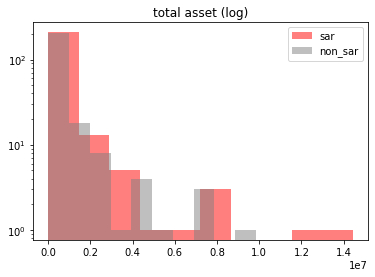

In [102]:
ta_df = customer_df[["total_asset", "sar_flag"]]
tas_df = ta_df.loc[ta_df.loc[:, "sar_flag"] == 1]
tans_df = ta_df.loc[ta_df.loc[:, "sar_flag"] == 0]

tans_df = tans_df.sample(n = 240)

kwargs = dict(alpha=0.5)
plt.title("total asset (log)")
plt.hist(tas_df["total_asset"], **kwargs, color = "red", label="sar", log = True)
plt.hist(tans_df["total_asset"], **kwargs, color = "grey", label="non_sar", log = True)
plt.legend()
plt.show()

## AGE

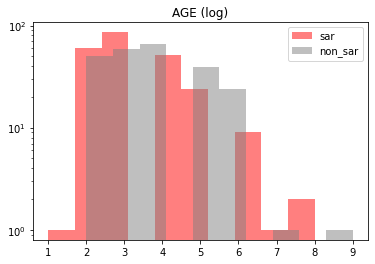

In [103]:
a_df = customer_df[["AGE", "sar_flag"]]
as_df = a_df.loc[a_df.loc[:, "sar_flag"] == 1]
ans_df = a_df.loc[a_df.loc[:, "sar_flag"] == 0]

ans_df = ans_df.sample(n = 240)

kwargs = dict(alpha=0.5)
plt.title("AGE (log)")
plt.hist(as_df["AGE"], **kwargs, color = "red", label="sar", log = True)
plt.hist(ans_df["AGE"], **kwargs, color = "grey", label="non_sar", log = True)
plt.legend()
plt.show()

# BaseLine 

precision:  0.03571428571428571
recall:  0.01818181818181818
f1 score:  0.024096385542168672


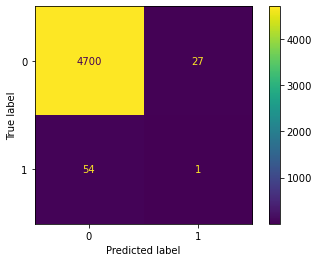

In [104]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

dt_df = customer_df.copy()
X = dt_df[["risk_rank", "occupation_code", "total_asset", "AGE"]]
y = dt_df["sar_flag"]
X = X.fillna(99)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dtc = DecisionTreeClassifier()
model = dtc.fit(X_train, y_train)

y_predict = model.predict(X_test)

print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1 score: ", f1_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()


## Initial Thoughts
1. Many transactions on the same day seams suspicious



----

# Time Series

In [105]:
y_df = customer_df[['cust_id','sar_flag']].set_index('cust_id')

In [106]:
##pivot
cdtx_pivot = pd.pivot_table(cdtx_df, values='amt', index=['date'], columns=['cust_id'], aggfunc=np.sum)
cdtx_pivot = cdtx_pivot.fillna(0)
cdtx_pivot = cdtx_pivot[list(set(y_df.index) & set(cdtx_pivot.columns))]
cdtx_pivot

##you may use pd.resample to change frequency

cust_id,3e91bc7d6a3c2a72b56445dbe8aed03a68dea3a2f53c0918084d95965ab1e723,e73cf871caf6e472164b0f265392094cacd6a6139961f3b6f918389483c90823,dc1593c6a77feaa5bc62b4c4a4b9ffd0577ab46ed35dd2136db19834f8630184,f191575777ee3fec216414f04677ceee4b1c94f9654e6d1d018da0e00cc15bb9,5e33b1703b1983340e6537bd5170cf469da569364d1f37bb326ef0ff25eb1b98,540956f7910f96e94ec002ac882a75be2a7212287be0ce5930dccc12d0abafa1,c3f4fc7e760644754257a60e4f849c79ce62dfb6dd4ab9d54aa20f1b665069b9,9a3ffc47eb5a957ab15a507d641afb556c9cd7b7159b4090745bebd745203a41,36243317cbcbe67c89433d99d583be51083d2210de5745e72c440998e4efcd49,03ce53f74b4ae2d6860bba171942cc6de335ea1eeb22a175d5cfe82fdf264e81,...,c9a141457cfb59b3ac1d437fa608c9504aa4f6ac9a9cdf5ebaaebdd5b314a311,369ade5c61774366f6cc0118b501433d5b522a99079c2f9e3dd99d7bb8ec7ee6,ab5a302db4251c1e6769aca004bba20d63f50b1614245a900e45da89d2ac08c6,dbcd2468cad9caaa6990ce9cd61b1f13d428835e18f2786cabab6479914d8086,1c23013102e1abd95105fe8b81636fbf37e707bf469c4743d570cad43c22fa6b,701cc14702a42f197624ef26a56711acd08e6c8e885d969e02d911f762986737,840066039c99ba5225bb895ab417e77c0a2ffe853aa6b706872aac4c896f7620,61c021be7eaf3e34bb024a5d77715804bd161918ff3ac3dee85af7eb0dec8053,0d8fad045fd9208f7c8efaaf2b0ad32972c4167bfc4a16e9a0597abe4e22d39f,8a89be5b38f76afa6deeb419c9efd97fca86463faba234f3d798db28be3a91f6
date,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,410.0,0.0,161.0,55309.0,330.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14926.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3130.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39338.0,0.0,...,0.0,0.0,3446.0,0.0,0.0,39425.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,319.0,0.0,2714.0,0.0,...,0.0,0.0,4951.0,0.0,0.0,8515.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,956.0,12222.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7263.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,0.0,0.0,1335.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,2655.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,404.0,0.0,0.0,0.0,0.0,0.0,0.0,226.0,0.0,0.0


In [107]:
##pivot
dp_pivot = pd.pivot_table(dp_df, values='tx_amt', index=['tx_date'], columns=['cust_id'], aggfunc=np.sum)
dp_pivot = dp_pivot.fillna(0)
dp_pivot = dp_pivot[list(set(y_df.index) & set(dp_pivot.columns))]
dp_pivot

##you may use pd.resample to change frequency

cust_id,540956f7910f96e94ec002ac882a75be2a7212287be0ce5930dccc12d0abafa1,b8d6faf7172dc97d42400bc32aedff190f77323976f42e8efc7a1f6d06f77879,569a1787c8dfb7459f7fffbc78792c05fc282ee5f85c028ca9e71ea58b190f44,01c3f5aa308f5a92beafce898c03dbec68e60db94c656e2187594ed028f8e32c,48a2ae9415402ff9d73e1ce4487123434e1888da644b1e835e6bbd86b96b84ad,20b9a1a838214764fd514b0b1fedd59faeac162222cd18baa5f50b3131437435,9dfa9b1d77c09ee54a8ace8c06dc02a85c14a884393133552faaa0c156ca5477,f953a1a9667e28f1287d4ea54ff616c1a80be1e376a02a0fbf3dedabca5dc0fc,d858622ca6a78ae5a808a925f3915ca09b9761ba8a8afa75c9ae44d9ad4199be,b9053f1cdeabfa6a178e73490680693c67e47aaf40b2a4a1a9e6ea57afa2f595,...,fcb96d79cc73744ad8e5f5846acd4305cb6cd7a7f8882a9ddbbbcbfb94329bf9,4f37c94e344741f6b8f0f343d8832a7716d157cf4a428957e81cc0927f822a19,a9ff5199a6667dbc2607279eec4b3b672c6afa844a81f3011467954872945787,33c00ff51d88fd09732e79a5394169f38d3306256d4dcb88eee64b7de05d56c0,93fa009cdb9749a4406a34f847ec231d1755e578c90de8d0a1355544cc24016f,632da21c6943b90d2d44ad824e50e7f273766b655361d0cc8df5d31c301024f4,78c324f3f2f298f4e080807b54c328e65ca77423b3ee0bb5bc2f277edfce62a9,dfd649be74c69bfd89388f15204ac0f80b7ab42dec3a902c8c3114f415f196e8,881cabb7e6834bacf80b693ad731f186308f22c20d4768c4fecb091bb5af337a,7224e3a067b5e90c9b2a5bdbcfe81884505ab44f0566aecd3940244d1b99d817
tx_date,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,696713.0,4225.0,0.0,...,10695.0,1.0,2455.0,0.0,0.0,0.0,209430.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2496.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,13371.0,0.0,0.0,1847.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,311593.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.0,0.0,0.0,0.0,1046.0,0.0,0.0,0.0,0.0,...,7227.0,1.0,455.0,1476.0,0.0,1.0,48744.0,0.0,0.0,7507036.0
391,0.0,1121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,0.0,0.0,1173.0,5130.0,0.0,0.0,0.0,0.0,17038981.0
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32908.0,0.0,0.0,0.0,4162.0,1.0,0.0,0.0,0.0,19263851.0


In [108]:
#pivot_dic = pivot.to_dict()
X_ts = dp_pivot.T.to_numpy()
y_ts = np.array([y_df.loc[i,'sar_flag'].max() for i in dp_pivot.columns])

C:\Users\ASUS\AppData\Local\Temp/ipykernel_26248/1140045340.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 2))


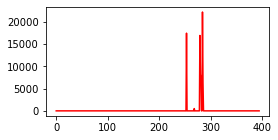

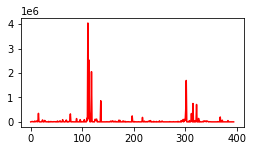

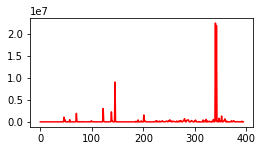

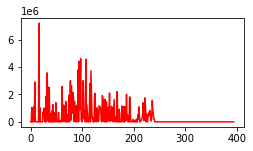

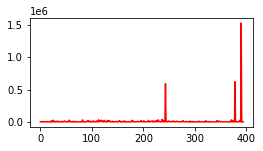

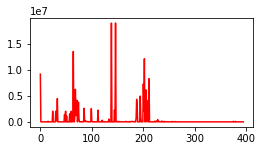

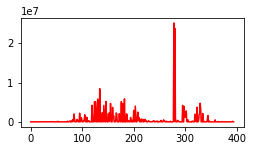

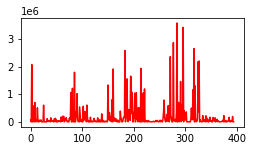

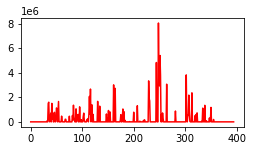

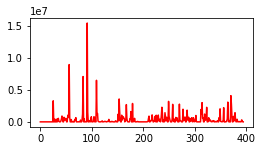

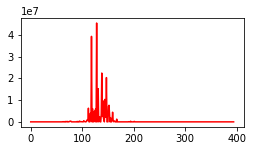

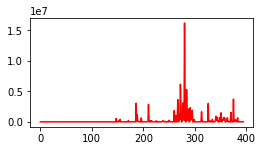

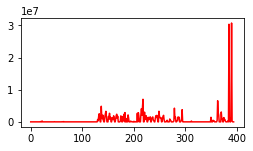

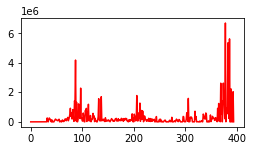

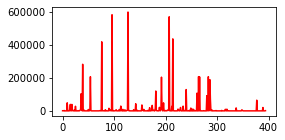

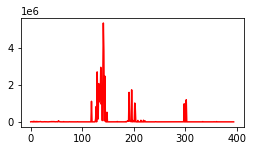

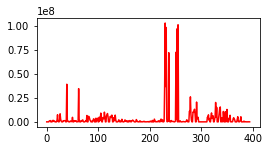

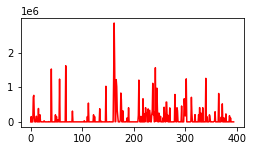

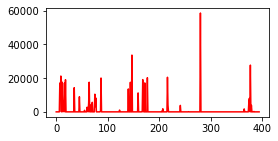

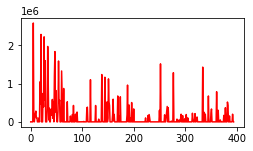

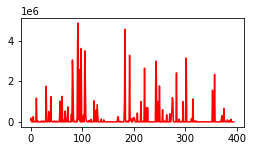

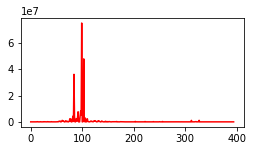

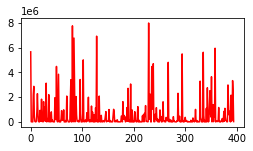

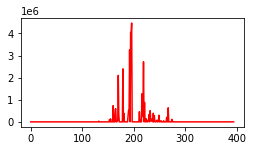

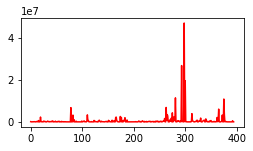

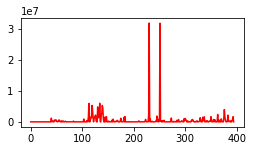

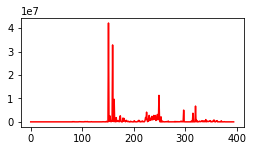

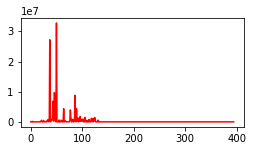

In [109]:
#abnormal
color_label = ['grey','red']
for i in range(500):
  if y_ts[i]==1:
    plt.figure(figsize=(4, 2))
    plt.plot(X_ts[i], color=color_label[y_ts[i]])

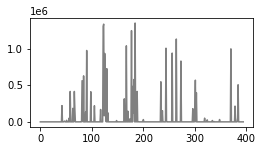

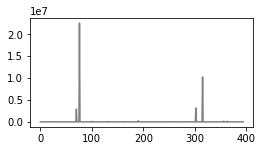

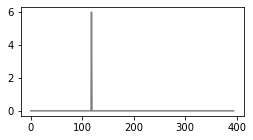

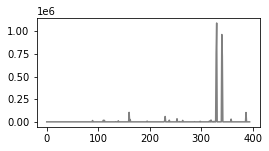

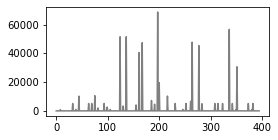

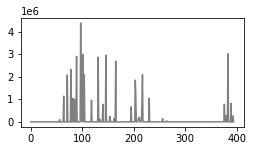

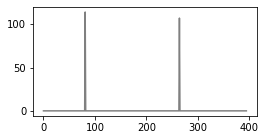

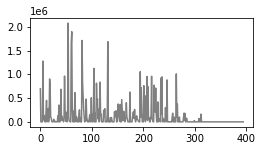

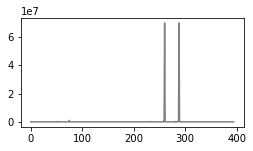

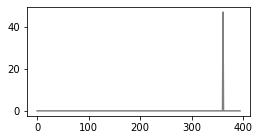

In [110]:
#normal
color_label = ['grey','red']
for i in range(10):
  if y_ts[i]==0:
    plt.figure(figsize=(4, 2))
    plt.plot(X_ts[i], color=color_label[y_ts[i]])

In [111]:
pd.Series(y_ts).value_counts()

0    5530
1     232
dtype: int64

# Autoencoder

In [112]:
#Coderef: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb#scrollTo=sOcfXfXq6FBd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

C:\Users\ASUS\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [113]:
# Download the dataset
dataframe = dp_pivot.T
raw_data = dataframe.values


In [114]:
# The last element contains the labels
labels = y_ts
timelen = dp_pivot.shape[0]

# The other data points are the electrocadriogram data
data = raw_data

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [115]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [116]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

anomalous_train_data = train_data[train_labels]
anomalous_test_data = test_data[test_labels]

In [117]:
print(normal_train_data.shape)
print(anomalous_train_data.shape)

(4420, 395)
(189, 395)


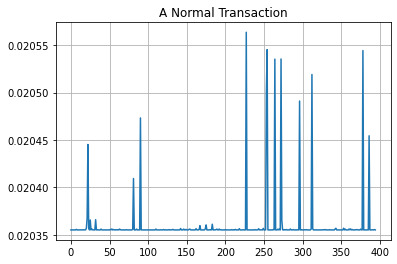

In [118]:
plt.grid()
plt.plot(np.arange(timelen), normal_train_data[0])
plt.title("A Normal Transaction")
plt.show()

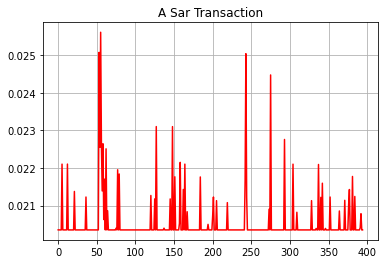

In [119]:
plt.grid()
plt.plot(np.arange(timelen), anomalous_train_data[5], color='r')
plt.title("A Sar Transaction")
plt.show()

### LSTM Autoencoder

![Autoencoder](https://lilianweng.github.io/lil-log/assets/images/autoencoder-architecture.png)
*Sample Autoencoder Architecture [Image Source](https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html)*

In [120]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(timelen, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [121]:
autoencoder.compile(optimizer='adam', loss='mae')

In [122]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=50, 
          batch_size=128,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 0.4035 - val_loss: 0.0808
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0223 - val_loss: 0.0204
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.0204
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.0204
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0196 - val_loss: 0.0144
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0013
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 8.1443e-04 - val_loss: 5.7801e-04
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 8.7565e-04 - val_loss: 6.5817e-04
Epoch 9/50
35/35 [==============================] - 0s 5ms/step - loss: 8.6251e-04 - val_loss: 5.6828e-04
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 8.6279e-04 - val_loss

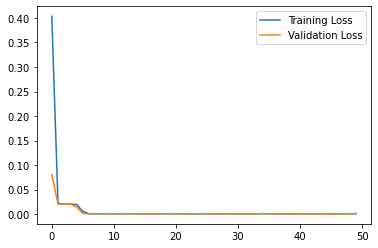

In [123]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

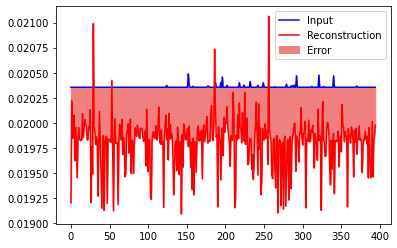

In [124]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

sample=100
plt.plot(normal_test_data[sample], 'b')
plt.plot(decoded_data[sample], 'r')
plt.fill_between(np.arange(timelen), decoded_data[sample], normal_test_data[sample], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

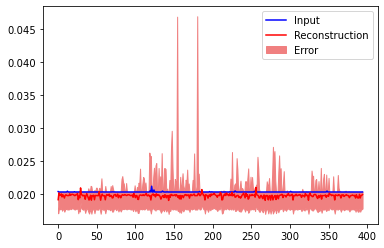

In [125]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[20], 'b')
plt.plot(decoded_data[20], 'r')
plt.fill_between(np.arange(timelen), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

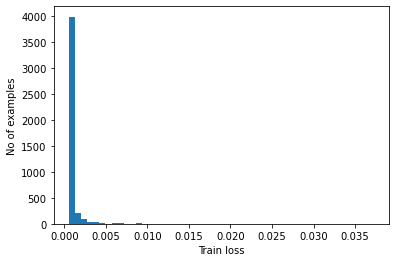

In [126]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [127]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.0020738347


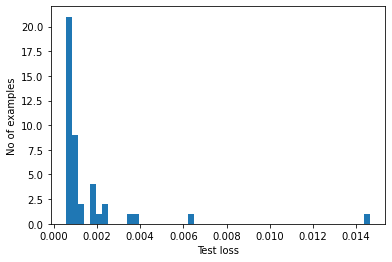

In [128]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [129]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [130]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.07285342584562012
Precision = 0.03363636363636364
Recall = 0.8604651162790697


# Statistic Value

In [131]:
from scipy.stats import skew, entropy
from numpy import inf

#basic stat of transaction
dp_pivot = pd.pivot_table(dp_df, values='tx_amt', index=['tx_date'], columns=['cust_id'], aggfunc=np.sum)
dp_pivot = dp_pivot.fillna(0)
stat = dp_pivot.describe().T
stat.head()


,count,mean,std,min,25%,50%,75%,max
cust_id,,,,,,,,
0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,395.0,7185.212658,106154.546178,0.0,0.0,0.0,0.0,2084353.0
002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,395.0,635.708861,4564.788273,0.0,0.0,0.0,0.0,58370.0
002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,395.0,40890.703797,316549.081859,0.0,0.0,0.0,0.0,4479327.0
0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,395.0,82508.726582,416442.718961,0.0,0.0,0.0,0.0,5826371.0
0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381,395.0,171152.898734,557435.117722,0.0,0.0,2002.0,99120.5,6445011.0


In [132]:
stat.shape

(6196, 8)

In [133]:
#add entropy and skew
entropy_day = pd.DataFrame(dp_pivot.apply(entropy),columns=['entropy'])
entropy_day[entropy_day == -inf] = 0
skew_day = pd.DataFrame(dp_pivot.apply(skew), columns=['skew'])
stat = stat.join(entropy_day).join(skew_day)

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2751: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [134]:
stat.shape

(6196, 10)

In [135]:
#add transaction others
dp_atm = pd.pivot_table(dp_df, values='ATM', index=['cust_id'], aggfunc=[np.sum,len])
dp_atm.columns = ['atm_sum','tx_len']
dp_atm['atm_ratio'] = dp_atm.atm_sum/dp_atm.tx_len

dp_crossbank = pd.pivot_table(dp_df, values='cross_bank', index=['cust_id'], aggfunc=[np.sum,len])
dp_crossbank.columns = ['xbank_sum','tx_len']
dp_crossbank['xbank_ratio'] = dp_crossbank.xbank_sum/dp_crossbank.tx_len

stat = stat.join(dp_atm['atm_ratio']).fillna(0)
stat = stat.join(dp_crossbank['xbank_ratio']).fillna(0)

In [136]:
#add remit data
remit_pivot = pd.pivot_table(remit_df, values='trade_amount_usd', index=['cust_id'], aggfunc=[len, np.mean, np.std, np.sum])
remit_pivot.columns = ['remit_cnt','remit_mean','remit_std','remit_sum']

#add cdtx data
cdtx_df_stat_pivot = pd.pivot_table(cdtx_df, values='amt', index=['cust_id'], aggfunc=[len, np.mean, np.std, np.sum])
cdtx_df_stat_pivot.columns = ['cdtx_cnt','cdtx_mean','cdtx_std','cdtx_sum']


stat = stat.join(remit_pivot).fillna(0)
stat = stat.join(cdtx_df_stat_pivot).fillna(0)
stat = stat.round(3)

In [137]:
dp_df['tx_type'].value_counts()

2    1847519
1     114317
3       7982
Name: tx_type, dtype: int64

In [138]:
dp_txtype = pd.pivot_table(dp_df, values='tx_date',columns=['tx_type'], index=['cust_id'], aggfunc=[len]).fillna(0)
dp_txtype.columns=['txtype_1','txtype2','txtype3']
dp_txtype_ratio = dp_txtype.div(dp_txtype.sum(axis=1), axis=0)
stat = stat.join(dp_txtype_ratio).fillna(0)
dp_txtype_ratio

,txtype_1,txtype2,txtype3
cust_id,,,
0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,0.066667,0.933333,0.0
002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,0.000000,1.000000,0.0
002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,0.217391,0.782609,0.0
0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,0.000000,1.000000,0.0
0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381,0.016452,0.983548,0.0
...,...,...,...
ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,0.058577,0.941423,0.0
ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42dd8089cffc788b4a9e,0.141956,0.858044,0.0
ffeb846f2294ec4397f800736dc1e14eb754da5425398d9a3bb81469b764b16f,0.039216,0.960784,0.0


In [139]:
stat.shape

(6196, 23)

In [140]:
stat.head()

,count,mean,std,min,25%,50%,75%,max,entropy,skew,...,remit_mean,remit_std,remit_sum,cdtx_cnt,cdtx_mean,cdtx_std,cdtx_sum,txtype_1,txtype2,txtype3
cust_id,,,,,,,,,,,,,,,,,,,,,
0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,395.0,7185.213,106154.546,0.0,0.0,0.0,0.0,2084353.0,1.219,19.101,...,0.0,0.000,0.0,84.0,1053.321,4346.508,88479.0,0.066667,0.933333,0.0
002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,395.0,635.709,4564.788,0.0,0.0,0.0,0.0,58370.0,2.244,9.555,...,0.0,0.000,0.0,362.0,13090.122,27801.054,4738624.0,0.000000,1.000000,0.0
002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,395.0,40890.704,316549.082,0.0,0.0,0.0,0.0,4479327.0,2.599,12.729,...,343647.0,0.000,343647.0,206.0,1985.859,4189.990,409087.0,0.217391,0.782609,0.0
0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,395.0,82508.727,416442.719,0.0,0.0,0.0,0.0,5826371.0,3.333,10.025,...,0.0,0.000,0.0,614.0,1996.305,7038.178,1225731.0,0.000000,1.000000,0.0
0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381,395.0,171152.899,557435.118,0.0,0.0,2002.0,99120.5,6445011.0,4.118,6.082,...,120400.8,231067.034,602004.0,3.0,2092.333,360.173,6277.0,0.016452,0.983548,0.0


In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

def df_get_dummies(df,columns=[]):
  for col in columns:
    dummy = pd.get_dummies(df[col].fillna(0).astype(int))
    df_dummy = pd.concat([df, dummy], axis=1)
    df_dummy = df_dummy.drop(columns=col)
    return df_dummy

#How many alert by cust_id
alert_cnt = pd.pivot_table(customer_df, values='alert_key', index=['cust_id'], aggfunc=[len])

#clean duplicate cust_id
customer_df_unique = customer_df.drop_duplicates(subset=['cust_id'],keep='last')

dt_df = customer_df_unique[customer_df_unique.cust_id.isin(stat.index)].set_index('cust_id')
dt_df = df_get_dummies(dt_df,['occupation_code']).join(stat)

X = dt_df.drop(columns=['alert_key','sar_flag'])
y = dt_df["sar_flag"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

precision:  0.17857142857142858
recall:  0.21739130434782608
f1 score:  0.19607843137254902


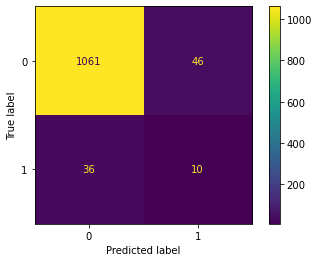

In [142]:
#Decision Tree
dtc = DecisionTreeClassifier()
model = dtc.fit(X_train, y_train)

y_predict = model.predict(X_test)

print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1 score: ", f1_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
precision:  0.38461538461538464
recall:  0.10869565217391304
f1 score:  0.1694915254237288


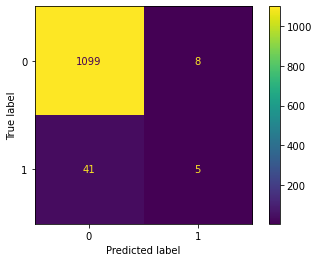

In [143]:
#Xgboost
xgb = XGBClassifier(n_estimators=200, learning_rate= 0.001)

xgb.fit(X_train, y_train)

y_predict = xgb.predict(X_test)

print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1 score: ", f1_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

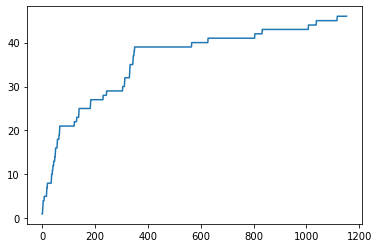

In [144]:
score = pd.DataFrame(xgb.predict_proba(X_test),columns=['nosar','sar'])
score['Y'] = y_test.values
score['Y_pred'] = y_predict
score = score.sort_values('sar',ascending=False)
plt.plot(list(score['Y'].cumsum()))

In [145]:
score

,nosar,sar,Y,Y_pred
973,0.425217,0.574783,1,1
318,0.425217,0.574783,0,1
981,0.425217,0.574783,1,1
627,0.425217,0.574783,1,1
791,0.447347,0.552653,1,1
...,...,...,...,...
445,0.588601,0.411399,0,0
446,0.588601,0.411399,0,0
447,0.588601,0.411399,0,0
448,0.588601,0.411399,0,0


In [146]:
#One-class SVM
from sklearn import svm

X_oc = X.join(y)

X_good = X_oc[X_oc.sar_flag == 0].drop(columns=["sar_flag"])
X_sar = X_oc[X_oc.sar_flag == 1].drop(columns=["sar_flag"])

X_good_train, X_good_test = train_test_split(X_good,  test_size = 0.2)

# fit model nu: An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. 
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(X_good_train)

OneClassSVM(gamma=0.1, nu=0.05)

In [147]:
y_pred_train = clf.predict(X_good_train) 
y_pred_test = clf.predict(X_good_test)   
y_pred_outliers = clf.predict(X_sar)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size 

In [148]:
print('training_acc:',1-n_error_train/len(X_good_train))

training_acc: 0.24423859014911886


accuracy_score:  0.17140718562874252
precision:  0.17140718562874252
recall:  1.0
f1 score:  0.29265175718849845


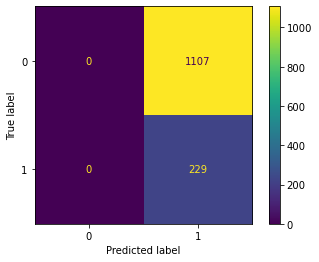

In [149]:
y_predict = list(y_pred_test)+list(y_pred_outliers)
y_predict = [1 if i == -1 else 0 for i in y_predict]
y_test = [0]*len(X_good_test) + [1]*len(X_sar)

accuracy_score
print("accuracy_score: ", accuracy_score(y_test, y_predict))
print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1 score: ", f1_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

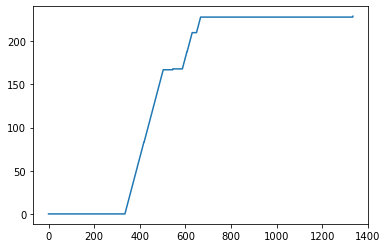

In [150]:
score = pd.DataFrame({'score':list(clf.score_samples(X_good_test))+list(clf.score_samples(X_sar))})
score['Y'] = y_test
score = score.sort_values('score',ascending=False)
plt.plot(list(score['Y'].cumsum()))

# make public prediction

In [281]:
dt_df_public = custinfo_df.set_index('cust_id')
X_public = dt_df_public[dt_df_public.alert_key.isin(public_key)]
X_public.shape

(1845, 5)

In [282]:
public = pd.read_csv('./public_alert.csv')
custinfo_df_raw = pd.read_csv("./public_train_x_custinfo_full_hashed.csv")
public_key = list(public.alert_key)
cust_alert_dict = (custinfo_df_raw[['cust_id','alert_key']].set_index('alert_key')).to_dict()
public.head()

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526


In [283]:
print('public key len:',len(public))
#print('cust_info intersaction:',len(alert_key_save))
print('dp intersection:', len(list(set(dp_pivot.columns) & set(dt_df_public[dt_df_public.alert_key.isin(public_key)].index))))
print('cdtx intersection:', len(list(set(cdtx_pivot.columns) & set(dt_df_public[dt_df_public.alert_key.isin(public_key)].index))))
print('X_shape:',X_public.shape)

X_shape: (1845, 5)


In [284]:
keep_cust_id =list(set(dp_pivot.columns) & set(dt_df_public[dt_df_public.alert_key.isin(public_key)].index))

In [285]:
dt_df_public = custinfo_df_raw.set_index('cust_id')
dt_df_public = df_get_dummies(dt_df_public,['occupation_code']).join(stat)


X_public = dt_df_public[dt_df_public.index.isin(keep_cust_id)]
alert_key_save = X_public.alert_key
X_public = X_public.drop(columns="alert_key")
X_public = X_public[X.columns]

X_public = X_public.fillna(0)

In [286]:
X_public.head()

,risk_rank,occupation_code,total_asset,AGE
cust_id,,,,
82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1,1,19.0,1465816.0,7
b212d14cb35676926682b2cf849e295d948888f556c07e854c4cdad9f32f5084,1,2.0,98177.0,2
e5b0002791c7852644a2730abeaa893cdf14a072ef78120275815edbd596cec0,1,19.0,2052922.0,7
74214c478dc6519fbefe4bc31693865bdcd698ab974b6435bb8fa842a3ed4fd8,3,15.0,201906.0,5
0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b341860b7e09990369f6466,1,12.0,7450.0,5


In [156]:
score_public = pd.DataFrame(xgb.predict_proba(X_public),columns=['nosar','sar'])
score_public['alert_key'] = alert_key_save.values
score_public = score_public.drop_duplicates()
score_public.sort_values('sar',ascending=False)

,nosar,sar,alert_key
1974,0.425217,0.574783,182343
1971,0.425217,0.574783,179773
913,0.425217,0.574783,184729
1975,0.425217,0.574783,183247
1972,0.425217,0.574783,180405
...,...,...,...
3625,0.588601,0.411399,211788
3626,0.588601,0.411399,219663
3627,0.588601,0.411399,220424
3628,0.588601,0.411399,221011


In [302]:
score_public.sort_values('sar',ascending=False).to_csv('./preiction_result.csv')